# Importing Libraries

In [72]:

import pandas as pd
from sklearn.linear_model import LogisticRegression

# importing ploting libraries
import matplotlib.pyplot as plt   

#importing seaborn for statistical plots
import seaborn as sns

#Let us break the X and y dataframes into training set and test set. For this we will use
#Sklearn package's data splitting function which is based on random function

from sklearn.model_selection import train_test_split

import numpy as np
#import os,sys
from scipy import stats

# calculate accuracy measures and confusion matrix
from sklearn import metrics

# Importing Dataset

In [73]:
dataset=pd.read_csv("bank-full.csv")

# EDA

In [74]:
dataset.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [148]:
dataset.tail()

,age,balance,duration,campaign,pdays,previous,Target,job_admin.,job_blue-collar,job_entrepreneur,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
45206,51,825,977,3,-1,0,yes,0,0,0,...,0,0,0,1,0,0,0,0,0,1
45207,71,1729,456,2,-1,0,yes,0,0,0,...,0,0,0,1,0,0,0,0,0,1
45208,72,5715,1127,5,184,3,yes,0,0,0,...,0,0,0,1,0,0,0,0,1,0
45209,57,668,508,4,-1,0,no,0,1,0,...,0,0,0,1,0,0,0,0,0,1
45210,37,2971,361,2,188,11,no,0,0,1,...,0,0,0,1,0,0,0,1,0,0


In [75]:
dataset.shape

(45211, 17)

In [76]:
#checking the datat type
dataset.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
Target       object
dtype: object

In [77]:
# Checking for null values
val=dataset.isnull().values.any()

if val==True:
    print("Missing values present : ", dataset.isnull().values.sum())
    dataset=dataset.dropna()
else:
    print("No missing values present")

No missing values present


In [78]:
# Finding the summary of the data
dataset.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [79]:
dataset.median()

dataset.std()

C:\Users\sanika\AppData\Local\Temp\ipykernel_12536\896811338.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  dataset.median()
C:\Users\sanika\AppData\Local\Temp\ipykernel_12536\896811338.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  dataset.std()


age           10.618762
balance     3044.765829
day            8.322476
duration     257.527812
campaign       3.098021
pdays        100.128746
previous       2.303441
dtype: float64

In [80]:
dataset.skew()

C:\Users\sanika\AppData\Local\Temp\ipykernel_12536\4231230252.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  dataset.skew()


age          0.684818
balance      8.360308
day          0.093079
duration     3.144318
campaign     4.898650
pdays        2.615715
previous    41.846454
dtype: float64

# Checking the presence of outliers

In [81]:
# AGE

print('Max age: ', dataset['age'].max())
print('Min age: ', dataset['age'].min())

Max age:  95
Min age:  18


Text(0.5, 1.0, 'Age Distribution')

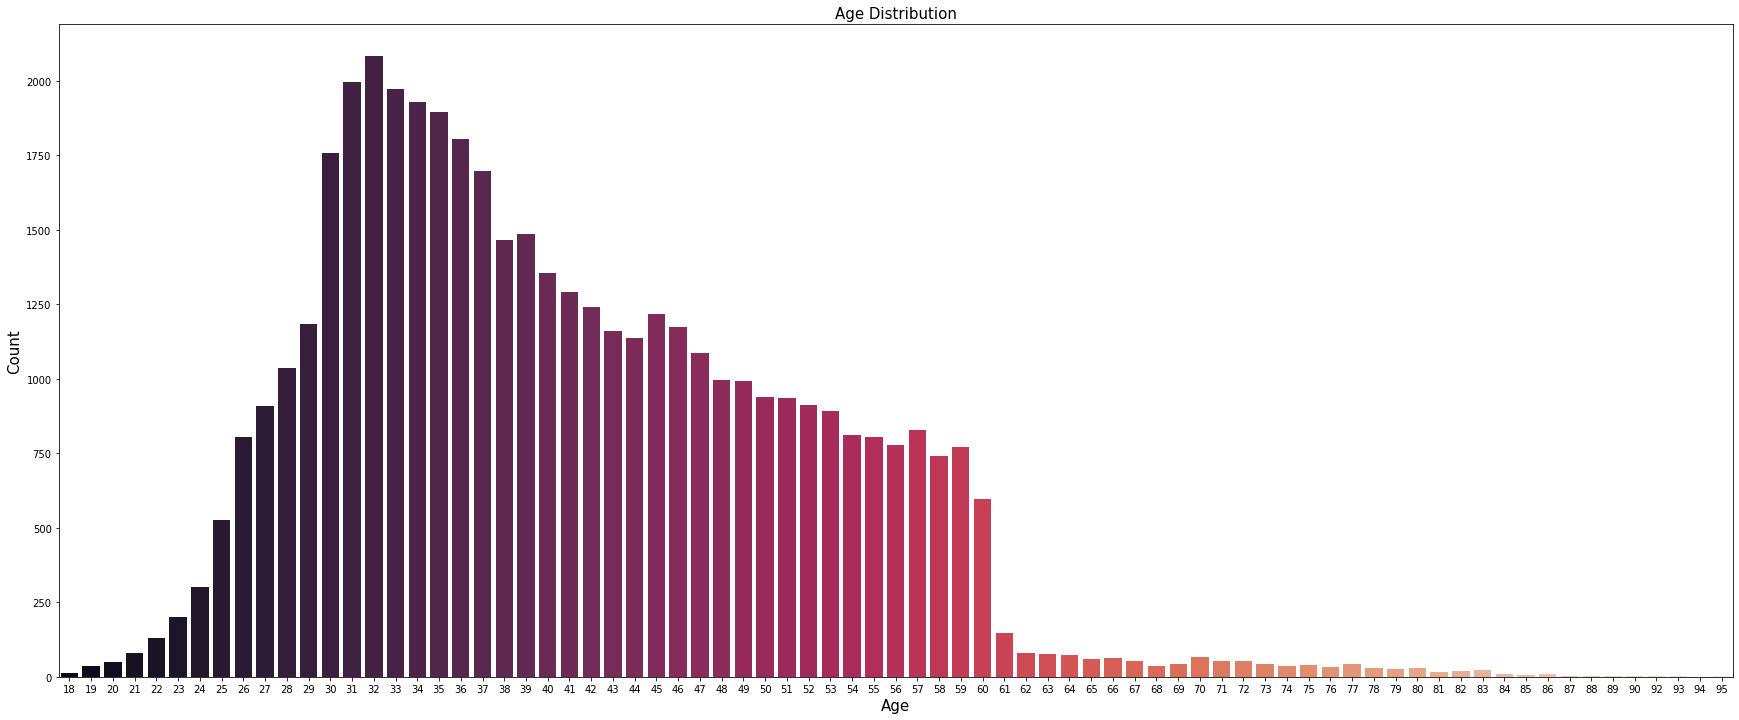

In [82]:
plt.figure(figsize = (30,12))
sns.countplot(x = 'age',  palette="rocket", data = dataset)
plt.xlabel("Age", fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.title('Age Distribution', fontsize=15)

C:\Users\sanika\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


Text(0.5, 1.0, 'Age Distribution')

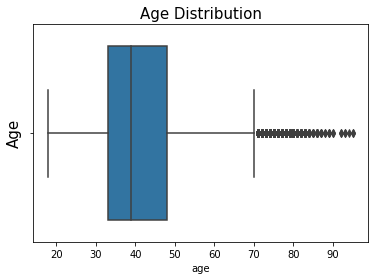

In [83]:
sns.boxplot(x = 'age', data = dataset, orient = 'v')
plt.ylabel("Age", fontsize=15)
plt.title('Age Distribution', fontsize=15)

In [84]:
#Quartiles
print('1º Quartile: ', dataset['age'].quantile(q = 0.25))
print('2º Quartile: ', dataset['age'].quantile(q = 0.50))
print('3º Quartile: ', dataset['age'].quantile(q = 0.75))


1º Quartile:  33.0
2º Quartile:  39.0
3º Quartile:  48.0


In [85]:
 # Interquartile range, IQR = Q3 - Q1
  # lower 1.5*IQR whisker = Q1 - 1.5 * IQR 
  # Upper 1.5*IQR whisker = Q3 + 1.5 * IQR
    
print('Ages above: ', dataset['age'].quantile(q = 0.75) + 
                      1.5*(dataset['age'].quantile(q = 0.75) - dataset['age'].quantile(q = 0.25)), 'are outliers')

Ages above:  70.5 are outliers


In [86]:
print('Numerber of outliers: ', dataset[dataset['age'] > 70.5]['age'].count())
print('Number of clients: ', len(dataset))
#Outliers in %
print('Outliers are:', round(dataset[dataset['age'] > 70.5]['age'].count()*100/len(dataset),2), '%')

Numerber of outliers:  487
Number of clients:  45211
Outliers are: 1.08 %


Text(0.5, 1.0, 'Job Distribution')

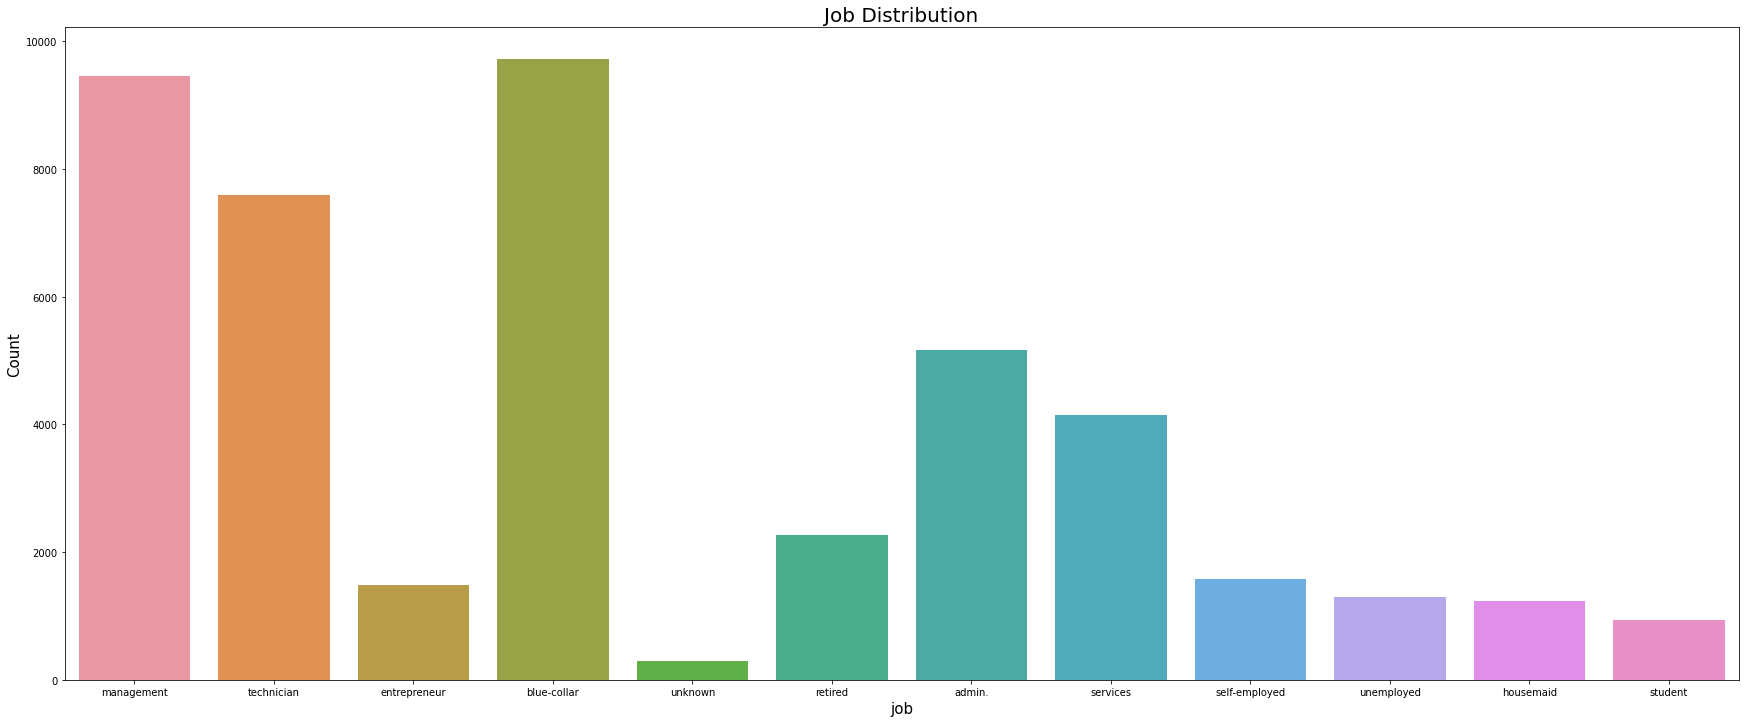

In [87]:
#Job
plt.figure(figsize = (30,12))
sns.countplot(x = 'job',data = dataset)
plt.xlabel("job", fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.title('Job Distribution', fontsize=20)

Text(0.5, 1.0, 'Marital Distribution')

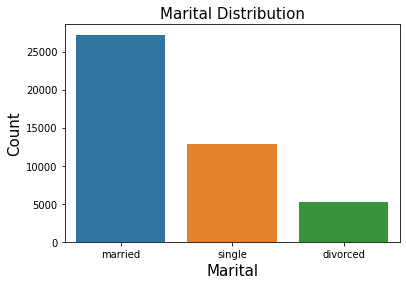

In [88]:
#Marital

#plt.figure(figsize = (30,12))
sns.countplot(x = 'marital',data = dataset)
plt.xlabel("Marital", fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.title('Marital Distribution', fontsize=15)

<AxesSubplot:xlabel='marital', ylabel='age'>

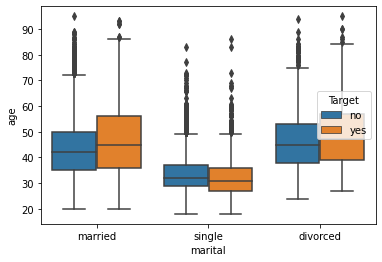

In [89]:
sns.boxplot(x='marital',y='age',hue='Target',data=dataset)

Text(0.5, 1.0, 'Education Distribution')

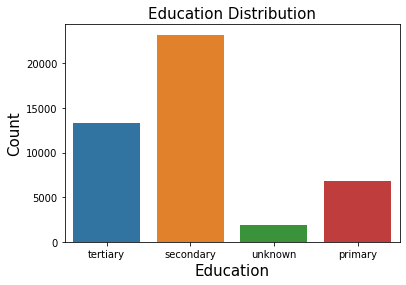

In [90]:
#Education

#plt.figure(figsize = (30,12))
sns.countplot(x = 'education',data = dataset)
plt.xlabel("Education", fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.title('Education Distribution', fontsize=15)

<AxesSubplot:xlabel='education', ylabel='age'>

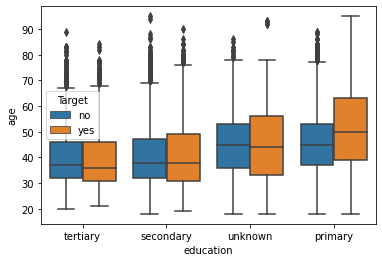

In [91]:
sns.boxplot(x='education',y='age',hue='Target',data=dataset)

Text(0.5, 1.0, 'Default Distribution')

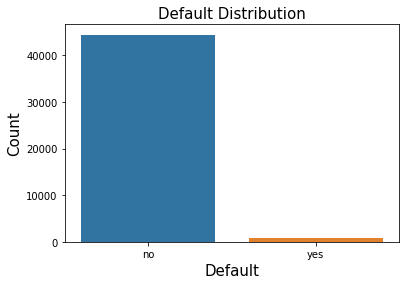

In [92]:
#plt.figure(figsize = (30,12))
sns.countplot(x = 'default',data = dataset)
plt.xlabel("Default", fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.title('Default Distribution', fontsize=15)

<AxesSubplot:xlabel='default', ylabel='age'>

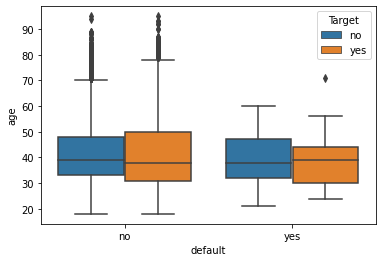

In [93]:
sns.boxplot(x='default',y='age',hue='Target',data=dataset)


In [94]:
print('Default:\n No credit in default:'     , dataset[dataset['default'] == 'no']     ['age'].count(),
              '\n Yes to credit in default:' , dataset[dataset['default'] == 'yes']    ['age'].count())

Default:
 No credit in default: 44396 
 Yes to credit in default: 815


Text(0.5, 1.0, 'Housing Distribution')

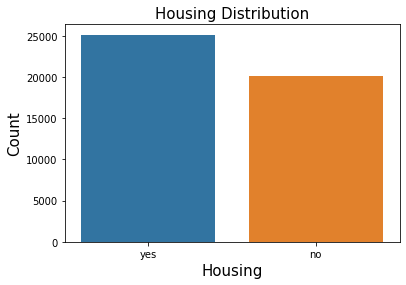

In [95]:
# Housing loan

#plt.figure(figsize = (30,12))
sns.countplot(x = 'housing',data = dataset)
plt.xlabel("Housing", fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.title('Housing Distribution', fontsize=15)

In [96]:
print('Housing:\n No Housing:'     , dataset[dataset['housing'] == 'no']     ['age'].count(),
              '\n Yes Housing:' , dataset[dataset['housing'] == 'yes']    ['age'].count())

Housing:
 No Housing: 20081 
 Yes Housing: 25130


<AxesSubplot:xlabel='housing', ylabel='age'>

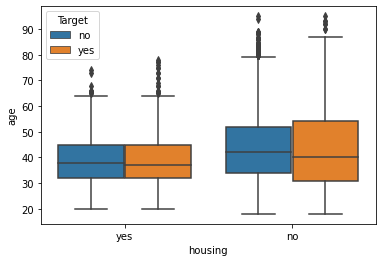

In [97]:
sns.boxplot(x='housing',y='age',hue='Target',data=dataset)

Text(0.5, 1.0, 'Loan Distribution')

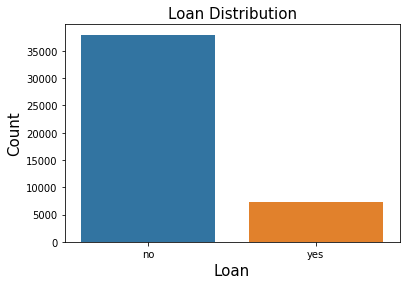

In [98]:
# Loan

#plt.figure(figsize = (30,12))
sns.countplot(x = 'loan',data = dataset)
plt.xlabel("Loan", fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.title('Loan Distribution', fontsize=15)

In [99]:
print('Loan:\n No Personal loan:'     , dataset[dataset['loan'] == 'no']     ['age'].count(),
              '\n Yes Personal Loan:' , dataset[dataset['loan'] == 'yes']    ['age'].count())

Loan:
 No Personal loan: 37967 
 Yes Personal Loan: 7244


<AxesSubplot:xlabel='loan', ylabel='age'>

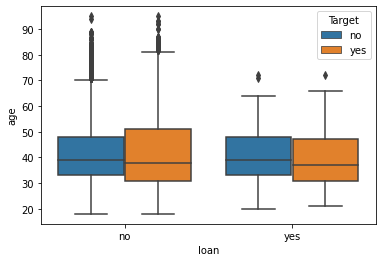

In [100]:
sns.boxplot(x='loan',y='age',hue='Target',data=dataset)

Text(0.5, 1.0, 'Contact Distribution')

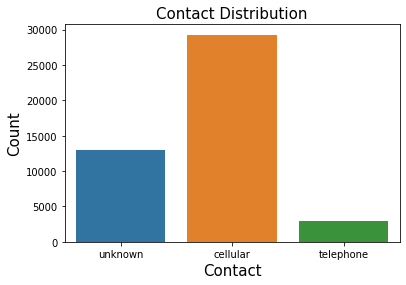

In [101]:
#plt.figure(figsize = (30,12))
sns.countplot(x = 'contact',data = dataset)
plt.xlabel("Contact", fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.title('Contact Distribution', fontsize=15)

In [102]:
print('Contact:\n Unknown Contact:'     , dataset[dataset['contact'] == 'unknown']     ['age'].count(),
              '\n Cellular Contact:'   , dataset[dataset['contact'] == 'cellular']    ['age'].count(),
              '\n Telephone Contact:'  , dataset[dataset['contact'] == 'telephone']   ['age'].count())

Contact:
 Unknown Contact: 13020 
 Cellular Contact: 29285 
 Telephone Contact: 2906


Text(0.5, 1.0, 'Monthly Distribution')

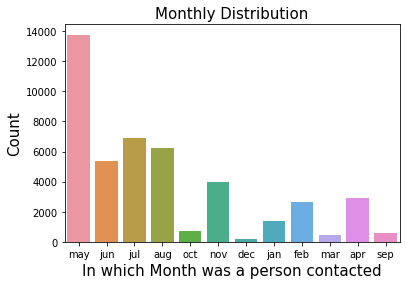

In [103]:
#Month

#plt.figure(figsize = (30,12))
sns.countplot(x = 'month',data = dataset)
plt.xlabel("In which Month was a person contacted", fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.title('Monthly Distribution', fontsize=15)

<AxesSubplot:xlabel='day'>

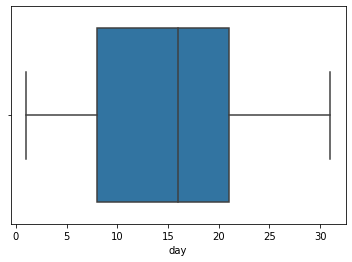

In [104]:
#Day

sns.boxplot(x=dataset["day"])

In [105]:
#Duration


<AxesSubplot:xlabel='duration'>

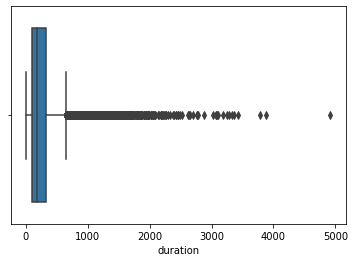

In [106]:
sns.boxplot(x=dataset["duration"])

In [107]:
# Quartiles
print('1º Quartile: ', dataset['duration'].quantile(q = 0.25))
print('2º Quartile: ', dataset['duration'].quantile(q = 0.50))
print('3º Quartile: ', dataset['duration'].quantile(q = 0.75))
print('4º Quartile: ', dataset['duration'].quantile(q = 1.00))

1º Quartile:  103.0
2º Quartile:  180.0
3º Quartile:  319.0
4º Quartile:  4918.0


In [108]:
  # Interquartile range, IQR = Q3 - Q1
  # lower 1.5*IQR whisker = Q1 - 1.5 * IQR 
  # Upper 1.5*IQR whisker = Q3 + 1.5 * IQR
    
print('Duration above: ', dataset['duration'].quantile(q = 0.75) + 
                      1.5*(dataset['duration'].quantile(q = 0.75) - dataset['duration'].quantile(q = 0.25)), 'are outliers')

Duration above:  643.0 are outliers


In [109]:
print('Numerber of outliers: ', dataset[dataset['duration'] > 643.0]['duration'].count())
print('Number of clients: ', len(dataset))
#Outliers in %
print('Outliers are:', round(dataset[dataset['duration'] > 643.0]['duration'].count()*100/len(dataset),2), '%')

Numerber of outliers:  3235
Number of clients:  45211
Outliers are: 7.16 %


In [110]:
#Campaign

Text(0.5, 1.0, 'Campaign Distribution')

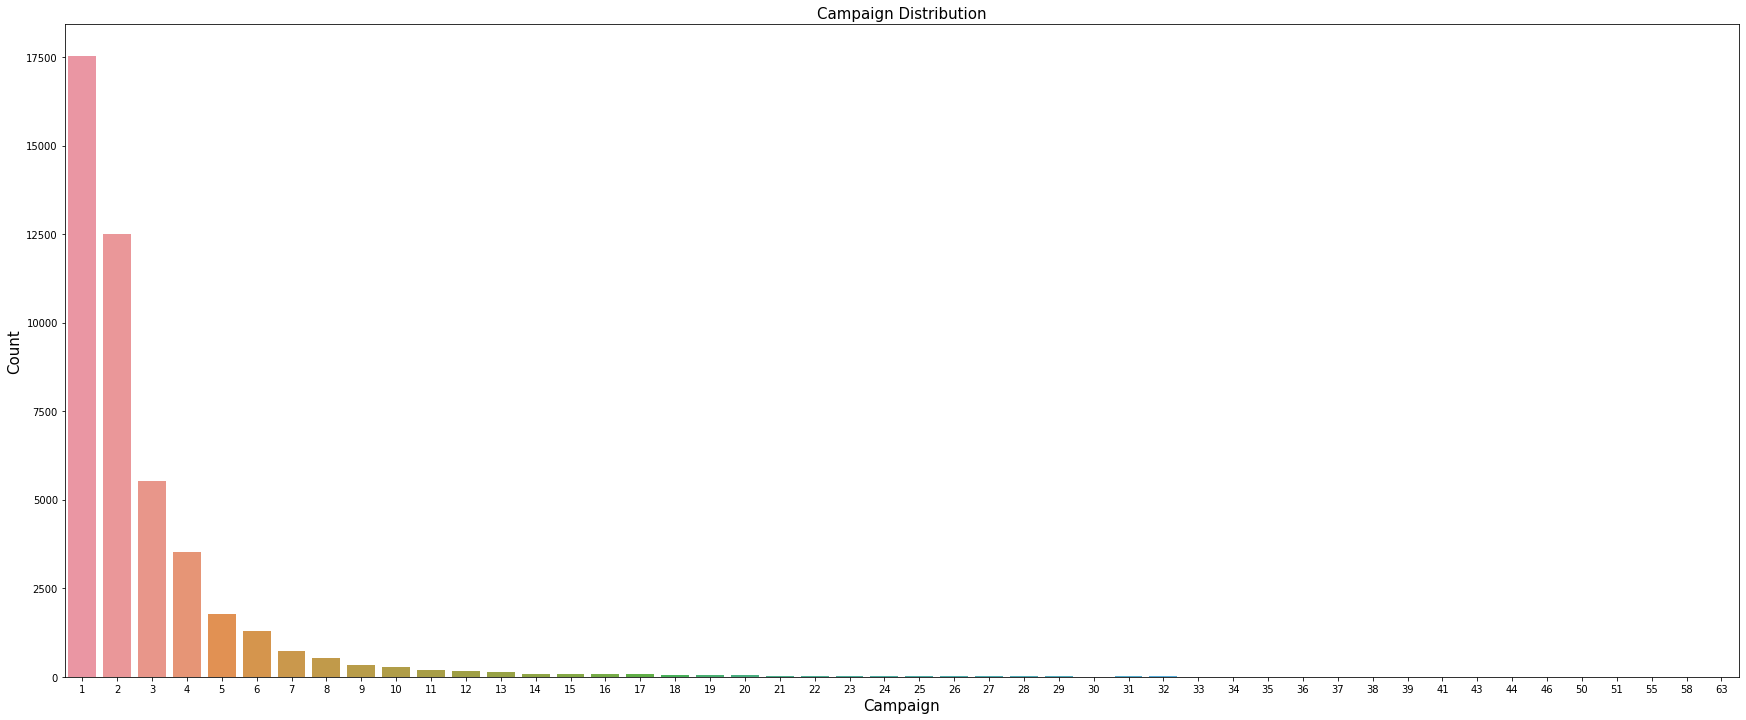

In [111]:
plt.figure(figsize = (30,12))
sns.countplot(x = 'campaign', data = dataset)
plt.xlabel("Campaign", fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.title('Campaign Distribution', fontsize=15)

C:\Users\sanika\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


Text(0.5, 1.0, 'Campaign Distribution')

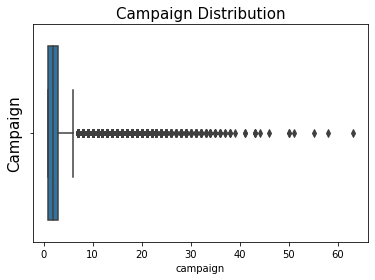

In [112]:
sns.boxplot(x = 'campaign', data = dataset, orient = 'v')
plt.ylabel("Campaign", fontsize=15)
plt.title('Campaign Distribution', fontsize=15)

In [113]:
# Quartiles
print('1º Quartile: ', dataset['campaign'].quantile(q = 0.25))
print('2º Quartile: ', dataset['campaign'].quantile(q = 0.50))
print('3º Quartile: ', dataset['campaign'].quantile(q = 0.75))
print('4º Quartile: ', dataset['campaign'].quantile(q = 1.00))

1º Quartile:  1.0
2º Quartile:  2.0
3º Quartile:  3.0
4º Quartile:  63.0


In [114]:
# Interquartile range, IQR = Q3 - Q1
  # lower 1.5*IQR whisker = Q1 - 1.5 * IQR 
  # Upper 1.5*IQR whisker = Q3 + 1.5 * IQR
    
print('Campaign above: ', dataset['campaign'].quantile(q = 0.75) + 
                      1.5*(dataset['campaign'].quantile(q = 0.75) - dataset['campaign'].quantile(q = 0.25)), 'are outliers')

Campaign above:  6.0 are outliers


In [115]:
print('Numerber of outliers: ', dataset[dataset['campaign'] > 6.0]['campaign'].count())
print('Number of clients: ', len(dataset))
#Outliers in %
print('Outliers are:', round(dataset[dataset['campaign'] > 6.0]['campaign'].count()*100/len(dataset),2), '%')

Numerber of outliers:  3064
Number of clients:  45211
Outliers are: 6.78 %


C:\Users\sanika\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_oldcore.py:1599: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


Text(0.5, 1.0, 'pdays Distribution')

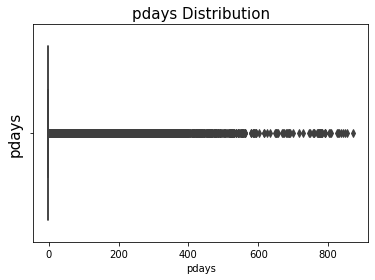

In [116]:
#pdays

sns.boxplot(x = 'pdays', data = dataset, orient = 'v')
plt.ylabel("pdays", fontsize=15)
plt.title('pdays Distribution', fontsize=15)

Text(0.5, 1.0, 'Poutcome distribution')

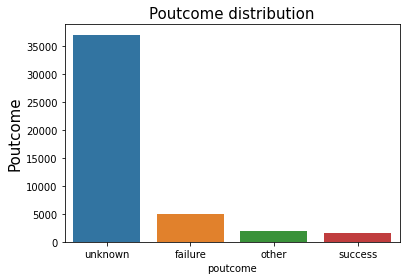

In [117]:
#previous outcome

sns.countplot(x = 'poutcome', data = dataset, orient = 'v')
plt.ylabel("Poutcome", fontsize=15)
plt.title('Poutcome distribution', fontsize=15)

In [118]:
print('poutcome:\n Unknown poutcome:'     , dataset[dataset['poutcome'] == 'unknown']   ['age'].count(),
              '\n Failure in  poutcome:'  , dataset[dataset['poutcome'] == 'failure']   ['age'].count(),
              '\n Other poutcome:'        , dataset[dataset['poutcome'] == 'other']     ['age'].count(),
              '\n Success in poutcome:'   , dataset[dataset['poutcome'] == 'success']   ['age'].count())

poutcome:
 Unknown poutcome: 36959 
 Failure in  poutcome: 4901 
 Other poutcome: 1840 
 Success in poutcome: 1511


<AxesSubplot:xlabel='poutcome', ylabel='age'>

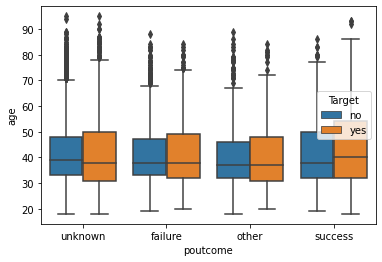

In [119]:
sns.boxplot(x='poutcome',y='age',hue='Target',data=dataset)

Text(0.5, 1.0, 'Target distribution')

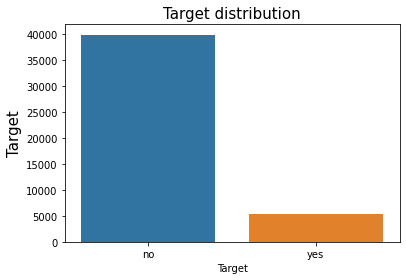

In [120]:
sns.countplot(x = 'Target', data = dataset, orient = 'v')
plt.ylabel("Target", fontsize=15)
plt.title('Target distribution', fontsize=15)


In [121]:
#Calculate correlation matrix

In [122]:
cor=dataset.corr()
cor

,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.097783,-0.009120,-0.004648,0.004760,-0.023758,0.001288
balance,0.097783,1.000000,0.004503,0.021560,-0.014578,0.003435,0.016674
day,-0.009120,0.004503,1.000000,-0.030206,0.162490,-0.093044,-0.051710
duration,-0.004648,0.021560,-0.030206,1.000000,-0.084570,-0.001565,0.001203
campaign,0.004760,-0.014578,0.162490,-0.084570,1.000000,-0.088628,-0.032855
pdays,-0.023758,0.003435,-0.093044,-0.001565,-0.088628,1.000000,0.454820
previous,0.001288,0.016674,-0.051710,0.001203,-0.032855,0.454820,1.000000


<AxesSubplot:>

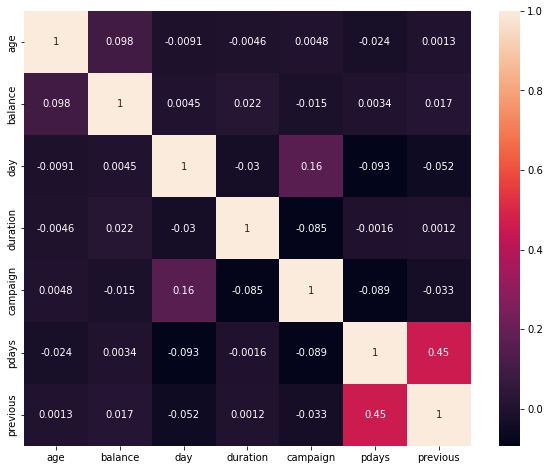

In [123]:
plt.subplots(figsize=(10,8))
sns.heatmap(cor,annot=True)

In [124]:
x = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [125]:
dataset=pd.get_dummies(dataset, columns=['job','marital','education','default','housing','loan','contact','day','month','poutcome'])

In [126]:
dataset.head()

,age,balance,duration,campaign,pdays,previous,Target,job_admin.,job_blue-collar,job_entrepreneur,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,2143,261,1,-1,0,no,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,44,29,151,1,-1,0,no,0,0,0,...,0,0,1,0,0,0,0,0,0,1
2,33,2,76,1,-1,0,no,0,0,1,...,0,0,1,0,0,0,0,0,0,1
3,47,1506,92,1,-1,0,no,0,1,0,...,0,0,1,0,0,0,0,0,0,1
4,33,1,198,1,-1,0,no,0,0,0,...,0,0,1,0,0,0,0,0,0,1


In [127]:
x=dataset.drop('Target', axis=1)
y=dataset['Target']

In [128]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 82 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   age                  45211 non-null  int64 
 1   balance              45211 non-null  int64 
 2   duration             45211 non-null  int64 
 3   campaign             45211 non-null  int64 
 4   pdays                45211 non-null  int64 
 5   previous             45211 non-null  int64 
 6   Target               45211 non-null  object
 7   job_admin.           45211 non-null  uint8 
 8   job_blue-collar      45211 non-null  uint8 
 9   job_entrepreneur     45211 non-null  uint8 
 10  job_housemaid        45211 non-null  uint8 
 11  job_management       45211 non-null  uint8 
 12  job_retired          45211 non-null  uint8 
 13  job_self-employed    45211 non-null  uint8 
 14  job_services         45211 non-null  uint8 
 15  job_student          45211 non-null  uint8 
 16  job_

In [129]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [130]:
print(y)

[0 0 0 ... 1 0 0]


In [139]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 0)

In [140]:
print(x_train)

       age  balance  duration  campaign  pdays  previous  job_admin.  \
13932   57      658       724         1     -1         0           1   
9894    37     1699        63         1     -1         0           0   
39946   35     2823       102         4     96         2           0   
9217    35      214       247         1     -1         0           1   
4124    38      323       138         1     -1         0           0   
...    ...      ...       ...       ...    ...       ...         ...   
30403   35      995        39         1     -1         0           0   
21243   35      750       233        12     -1         0           0   
42613   35      323       261         2     -1         0           0   
43567   70      616       149         2    182         1           0   
2732    46       57       194         4     -1         0           0   

       job_blue-collar  job_entrepreneur  job_housemaid  ...  month_jun  \
13932                0                 0              0  ...

In [141]:
print(x_test)

       age  balance  duration  campaign  pdays  previous  job_admin.  \
14001   37     1403        91        15     -1         0           0   
32046   36     -253      1073         1     -1         0           0   
13318   47     -406       243         5     -1         0           0   
42991   57      501       105         7    188         2           0   
14237   33     -406       332         2     -1         0           0   
...    ...      ...       ...       ...    ...       ...         ...   
18448   53      252       727         4     -1         0           0   
6654    28     1996        55         1     -1         0           0   
17106   28        7        50         3     -1         0           0   
9025    59        0       812         1     -1         0           0   
13171   50     -315       173         1     -1         0           0   

       job_blue-collar  job_entrepreneur  job_housemaid  ...  month_jun  \
14001                0                 0              0  ...

In [142]:
print(y_train)

[1 0 0 ... 1 0 0]


In [143]:
print(y_test)

[0 1 0 ... 0 1 0]


In [144]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(x_train, y_train)

C:\Users\sanika\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

In [145]:
y_pred = classifier.predict(x_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [1 1]
 [0 0]
 ...
 [0 0]
 [0 1]
 [0 0]]


In [146]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[7817  163]
 [ 854  209]]


0.8875373216852814